Primer Parcial Laboratorio

Arancibia Aguilar Daniel Andree


In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import r2_score
%matplotlib inline

In [132]:
url = "/content/drive/MyDrive/SIS420/Primer Parcial Laboratorio/cubic_zirconia.csv"
dataframe = pd.read_csv(url)
print(dataframe)

         label  carat        cut color clarity  depth  table     x     y  \
0          1.0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29   
1          2.0   0.33    Premium     G      IF   60.8   58.0  4.42  4.46   
2          3.0   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12   
3          4.0   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80   
4          5.0   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43   
...        ...    ...        ...   ...     ...    ...    ...   ...   ...   
26962  26963.0   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52   
26963  26964.0   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42   
26964  26965.0   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15   
26965  26966.0   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20   
26966  26967.0   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88   

          z   price  
0      2.66   499.0  
1      2.70   984.0  
2      3.78  6289.0  

In [133]:
dataframe['cut'] = pd.factorize(dataframe['cut'])[0]
dataframe['color'] = pd.factorize(dataframe['color'])[0]
dataframe['clarity'] = pd.factorize(dataframe['clarity'])[0]

print(dataframe)

         label  carat  cut  color  clarity  depth  table     x     y     z  \
0          1.0   0.30    0      0        0   62.1   58.0  4.27  4.29  2.66   
1          2.0   0.33    1      1        1   60.8   58.0  4.42  4.46  2.70   
2          3.0   0.90    2      0        2   62.2   60.0  6.04  6.12  3.78   
3          4.0   0.42    0      2        3   61.6   56.0  4.82  4.80  2.96   
4          5.0   0.31    0      2        4   60.4   59.0  4.35  4.43  2.65   
...        ...    ...  ...    ...      ...    ...    ...   ...   ...   ...   
26962  26963.0   1.11    1      1        0   62.3   58.0  6.61  6.52  4.09   
26963  26964.0   0.33    0      4        1   61.9   55.0  4.44  4.42  2.74   
26964  26965.0   0.51    1      0        5   61.7   58.0  5.12  5.15  3.17   
26965  26966.0   0.27    2      2        2   61.8   56.0  4.19  4.20  2.60   
26966  26967.0   1.25    1      5        0   62.0   58.0  6.90  6.88  4.27   

        price  
0       499.0  
1       984.0  
2      6289.0  

In [134]:
dataframe = dataframe.fillna(0)

In [135]:
print(dataframe.describe())

              label         carat           cut         color       clarity  \
count  26967.000000  26967.000000  26967.000000  26967.000000  26967.000000   
mean   13484.000000      0.798375      1.090444      2.425186      3.192457   
std     7784.846691      0.477745      1.113229      1.901771      2.258076   
min        1.000000      0.200000      0.000000      0.000000      0.000000   
25%     6742.500000      0.400000      0.000000      1.000000      1.000000   
50%    13484.000000      0.700000      1.000000      2.000000      3.000000   
75%    20225.500000      1.050000      2.000000      4.000000      5.000000   
max    26967.000000      4.500000      4.000000      6.000000      7.000000   

              depth         table             x             y             z  \
count  26967.000000  26967.000000  26967.000000  26967.000000  26967.000000   
mean      60.149256     57.456080      5.729854      5.733569      3.538057   
std        9.896451      2.232068      1.128516    

In [136]:
#Separamos las caracteristicas de la variable de salida
X = dataframe.drop(columns=['price'])
y = dataframe['price']
print(X.shape)
print(y.shape)

(26967, 10)
(26967,)


In [163]:
X=X.values
y=y.values
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')


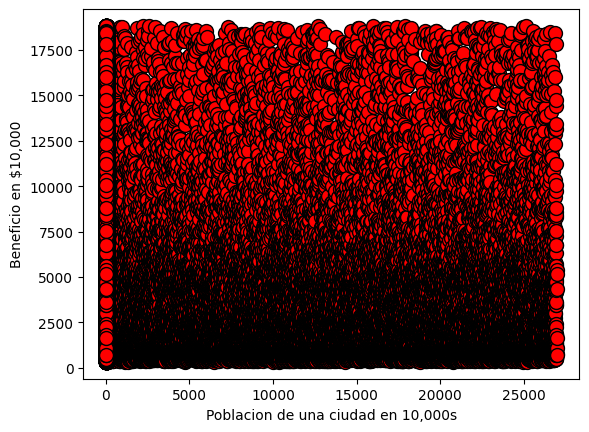

In [164]:
plotData(X, y)

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X.shape)
print(y.shape)

(21573, 10)
(21573,)
(26967, 10)
(26967,)


In [138]:
X_tr = X_train.values
Y_tr = Y_train.values
m = Y_tr.size
n = X_tr.shape[0]
print(m,n)

21573 21573


In [139]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [140]:
X_norm, mu, sigma = featureNormalize(X_tr)

print(X_tr)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[3.6590e+03 5.0000e-01 2.0000e+00 ... 5.1000e+00 5.1500e+00 3.2000e+00]
 [2.5800e+02 1.5300e+00 1.0000e+00 ... 7.4300e+00 7.4000e+00 4.5200e+00]
 [2.2030e+03 1.0000e+00 2.0000e+00 ... 6.3700e+00 6.3900e+00 3.9100e+00]
 ...
 [8.6100e+02 3.9000e-01 0.0000e+00 ... 4.6600e+00 4.7000e+00 2.9000e+00]
 [1.5796e+04 3.3000e-01 0.0000e+00 ... 4.4900e+00 4.5500e+00 2.7600e+00]
 [2.3655e+04 3.1000e-01 0.0000e+00 ... 4.3500e+00 4.3100e+00 2.7000e+00]]
Media calculada: [1.34921995e+04 7.98307607e-01 1.09256942e+00 2.42066472e+00
 3.19292634e+00 6.01369397e+01 5.74574283e+01 5.73127567e+00
 5.73302554e+00 3.53822231e+00]
Desviación estandar calculada: [7.79044257e+03 4.75034798e-01 1.11412757e+00 1.89730146e+00
 2.25826398e+00 9.94218193e+00 2.23961690e+00 1.12449896e+00
 1.11612285e+00 6.96011487e-01]
[[-1.2622132  -0.62797001  0.81447637 ... -0.56138395 -0.52236682
  -0.48594358]
 [-1.69877377  1.5402922  -0.08308691 ...  1.51064998  1.49354031
   1.41057684]
 [-1.44910888  0.42458446  0.81447637 

In [141]:
X_tr = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X_tr)

[[ 1.         -1.2622132  -0.62797001 ... -0.56138395 -0.52236682
  -0.48594358]
 [ 1.         -1.69877377  1.5402922  ...  1.51064998  1.49354031
   1.41057684]
 [ 1.         -1.44910888  0.42458446 ...  0.56800793  0.588622
   0.53415452]
 ...
 [ 1.         -1.62137123 -0.85953199 ... -0.95266933 -0.92554824
  -0.91697095]
 [ 1.          0.29572139 -0.98583853 ... -1.10384777 -1.05994205
  -1.11811706]
 [ 1.          1.30452159 -1.02794071 ... -1.22834766 -1.27497215
  -1.20432253]]


In [142]:
print(X_tr.shape)

(21573, 11)


In [143]:
def computeCostMultiReg(X_tr, Y_tr, theta, lambda_):
    m = Y_tr.shape[0]
    h = np.dot(X_tr, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - Y_tr))

    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    J = J + reg_term
    return J

In [144]:
def gradientDescentMultiReg(X, y, theta, alpha, num_iters, lambda_):
    m = y.shape[0]
    J_history = []
    for i in range(num_iters):
        h = np.dot(X, theta)

        grad = (1 / m) * np.dot(X.T, (h - y))

        reg_term = (lambda_ / m) * theta
        grad[1:] = grad[1:] + reg_term[1:]

        theta = theta - (alpha * grad)

        J_history.append(computeCostMultiReg(X_tr, Y_tr, theta, lambda_))
    return theta, J_history

theta calculado con regularizacion: [3935.855032      5.28769917 2651.94964184 -252.13309576 -363.21260509
 -206.51479633   -7.08090644  -55.91986118  387.42970645  497.15753041
  260.21557168]
El precio con regularización: 2197.8831


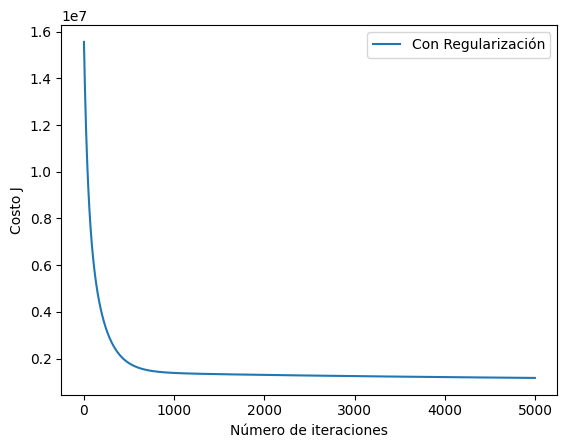

In [145]:
alpha = 0.003
num_iters = 5000
lambda_ = 0.1
thetaReg = np.zeros(X_tr.shape[1])

thetaReg, J_historyReg = gradientDescentMultiReg(X_tr, Y_tr, thetaReg, alpha, num_iters, lambda_)

print('theta calculado con regularizacion: {:s}'.format(str(thetaReg)))

pyplot.plot(np.arange(len(J_historyReg)), J_historyReg, label='Con Regularización')
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.legend()

precioReg = np.dot(X_tr, thetaReg)

print('El precio con regularización: {:.4f}'.format(precioReg[0]))

In [146]:
X_ts = X_test.values
Y_ts = Y_test.values
mts = Y_ts.size
print(X_ts.shape)
print(Y_ts.shape)

(5394, 10)
(5394,)


In [147]:
X_normts, mu, sigma = featureNormalize(X_ts)

print(X_ts)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_normts)

[[9.9230e+03 1.1000e+00 2.0000e+00 ... 6.6500e+00 6.6700e+00 4.0300e+00]
 [2.5557e+04 4.1000e-01 3.0000e+00 ... 4.6900e+00 4.7300e+00 2.9900e+00]
 [2.2422e+04 2.5000e-01 1.0000e+00 ... 4.0700e+00 4.0900e+00 2.4400e+00]
 ...
 [1.3539e+04 5.0000e-01 1.0000e+00 ... 5.1500e+00 5.0500e+00 3.1700e+00]
 [1.5462e+04 7.1000e-01 2.0000e+00 ... 5.8200e+00 5.8700e+00 3.4800e+00]
 [2.5687e+04 1.0900e+00 1.0000e+00 ... 6.6300e+00 6.5900e+00 4.0700e+00]]
Media calculada: [1.34512067e+04 7.98646644e-01 1.08194290e+00 2.44327030e+00
 3.19058213e+00 6.01985169e+01 5.74506859e+01 5.72416574e+00
 5.73574156e+00 3.53739711e+00]
Desviación estandar calculada: [7.76161564e+03 4.88392883e-01 1.10948495e+00 1.91926115e+00
 2.25711422e+00 9.71030789e+00 2.20139936e+00 1.14432200e+00
 1.34729678e+00 8.11571240e-01]
[[-0.45457117  0.6170306   0.82746242 ...  0.80906795  0.6934318
   0.60697431]
 [ 1.55970018 -0.7957664   1.72878154 ... -0.90373666 -0.74648851
  -0.67449052]
 [ 1.15578943 -1.1233715  -0.0738567  .

In [148]:
X_ts = np.concatenate([np.ones((mts, 1)), X_normts], axis=1)
print(X_ts)


[[ 1.         -0.45457117  0.6170306  ...  0.80906795  0.6934318
   0.60697431]
 [ 1.          1.55970018 -0.7957664  ... -0.90373666 -0.74648851
  -0.67449052]
 [ 1.          1.15578943 -1.1233715  ... -1.4455422  -1.22151377
  -1.35218827]
 ...
 [ 1.          0.01131121 -0.61148853 ... -0.5017519  -0.50897588
  -0.45269853]
 [ 1.          0.25906891 -0.18150683 ...  0.08374763  0.09965023
  -0.07072344]
 [ 1.          1.57644927  0.59655528 ...  0.79159036  0.63405365
   0.65626142]]


In [149]:
print(thetaReg.shape)

(11,)


In [150]:
Precio = np.dot(X_ts, thetaReg)

In [151]:
print(Precio)
print(Y_ts)

[6488.13302162  766.29321729 -945.45532357 ... 1430.53701079 3215.72219718
 6345.27057957]
[5667.  638.  450. ... 1431. 2918. 5219.]


In [168]:
# Calcula el R-cuadrado
r2 = r2_score(Y_ts, Precio)

print("Coeficiente de determinación :", r2*100)

Coeficiente de determinación : 85.01412128625152
